In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split

In [14]:
# Change directory to the desired path
%cd D:\Documents\ai_engineer_pacmann\ai_engineer_pacmann\CANDRA_MLPROCESS\src

import utils


D:\Documents\ai_engineer_pacmann\ai_engineer_pacmann\CANDRA_MLPROCESS\src


c:\Users\lolcandra\miniconda3\envs\mlproces-pacmann\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [15]:
from utils import load_data
from utils import split_input_output
from utils import split_train_test
from utils import serialize_data
from utils import deserialize_data

In [62]:
X_TRAIN_PATH = '..\data\interim\X_train.pkl'
Y_TRAIN_PATH = '..\data\interim\y_train.pkl'

In [24]:
%pwd

'D:\\Documents\\ai_engineer_pacmann\\ai_engineer_pacmann\\CANDRA_MLPROCESS\\src'

In [63]:
X_train = deserialize_data(path=X_TRAIN_PATH)
y_train = deserialize_data(path=Y_TRAIN_PATH)

In [64]:
print(X_train.shape)
print(y_train.shape)

(26064, 11)
(26064,)


In [65]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23563 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


**Kesimpulan dari dataset X_train:**
1. Terdapat 7 Numerical column/features 
-> person_age , person_income, person_emp_length, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length
2. Terdapat 4 Categorical column/features 
-> person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file
3. Terdapat beberapa data yang berbentuk Numerical dan Categorical data, dilakukan pemisahan yang berguna untuk dilakukannya data preprocessing lebih lanjut sehingga perlunya dilakukan pemisahan.

In [67]:
# Check is there any Duplicated Data in the X_train Dataframe
X_train.duplicated().sum()


np.int64(96)

## Check Duplicates data


In [68]:
def check_duplicates(data):
    """
    Fungsi untuk melakukan pengecekan terhadap data duplikat pada X_train.
    
    Parameters:
    X_train (pd.DataFrame): DataFrame yang akan dicek duplikatnya.
    
    Returns:
    pd.DataFrame: DataFrame yang sudah diurutkan dan menunjukkan duplikat jika ada.
    """
    # Mengecek duplikat dengan keep=False
    duplicates = X_train.duplicated(keep=False)
    
    # Memasukkan informasi duplikat ke dalam DataFrame
    X_train['is_duplicate'] = duplicates
    
    # Mengurutkan data berdasarkan kolom 'person_income'
    X_train_sorted = X_train.sort_values(by='person_income')
    
    return X_train_sorted


In [69]:
# Melakukan Pengurutan dengan fungsi diatas
X_train_sorted = check_duplicates(data=X_train)

print(X_train_sorted.duplicated().sum())

96


In [70]:
# Dataframe X_train sekarang tersorted dengan kolom 'person_income' terlihat dari perbedaan dataframe X_train diatas.
# Ketika setelah dilakukan pengecheckan dengan fungsi diatas
# terbuat 1 kolom baru 'is_duplicated' yang menyatakan apakah row tsb duplikat

X_train_sorted.head()

# Setelah dilakukan pengecheckan duplicate, karena parameter di set 'False'
# Maka data duplicate masih tetap ada
# terbuat 1 kolom (Series). yang menyatakan bahwa masing-masing row apakah duplikat atau tidak
# Data duplikat ini kedepannya dapat dilakukan pemisahan ataupun bisa dihapus sesuai dengan permintaan Business Owner/Business ANalyst nya.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,is_duplicate
31930,41,4000,RENT,0.0,MEDICAL,C,2000,13.22,0.50,Y,15,False
15964,21,4080,RENT,0.0,EDUCATION,B,1400,11.86,0.34,N,4,False
15963,21,4200,RENT,3.0,PERSONAL,E,2750,16.95,0.65,N,3,False
27896,32,4200,RENT,NaN,PERSONAL,C,1200,12.73,0.29,N,9,False
15960,22,4800,RENT,1.0,PERSONAL,D,1800,14.84,0.38,Y,2,False


## Check for Null Values

In [71]:
def check_null_values(data):
    """
    Fungsi untuk melakukan pengecekan terhadap nilai null pada kolom di X_train.
    
    Parameters:
    X_train (pd.DataFrame): DataFrame yang akan dicek nilai nullnya.
    
    Returns:
    pd.Series: Series yang menunjukkan jumlah nilai null per kolom.
    """
    # Mengecek nilai null dan menjumlahkan per kolom
    null_counts = data.isnull().sum()
    
    # Menyaring hanya kolom yang memiliki nilai null
    null_counts = null_counts[null_counts > 0]
    
    return null_counts


In [72]:
# Melakukan proses data kedalam Function 'check_null_values' untuk check Null Values
# dan Print counts Null values nya
X_train_null_counts = check_null_values(data = X_train_sorted)
print(X_train_null_counts)

# Null values yang terdeteksi ini kedepannya dapat dilakukan imputing atau delete data
# Tergantung dari kebutuhan bisnis, atau request dari Business Owner/Analyst.

person_emp_length     738
loan_int_rate        2501
dtype: int64


## Pengecekan Distribusi pada tiap Input


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

def check_distribution(data):
    """
    Fungsi untuk melakukan pengecekan distribusi pada tiap input numerik di data.
    
    Parameters:
    data (pd.DataFrame): DataFrame yang akan dicek distribusi kolom-kolom numeriknya.
    
    Returns:
    None: Fungsi ini akan menampilkan plot distribusi untuk setiap kolom numerik.

    Candra | Pacmann AI 2024.
    """
    # Seleksi hanya kolom numerik
    X_train_ = data.select_dtypes(include=['number']).columns.tolist()
    num_col = data[X_train_]
    
    # Perulangan untuk setiap kolom numerik
    for col in num_col:
        # Memanggil fungsi displot dari seaborn
        sns.displot(num_col[col], bins=20, kde=True)
        plt.xlabel(col)
        plt.title(f'Distribution of {col}')
        plt.show()


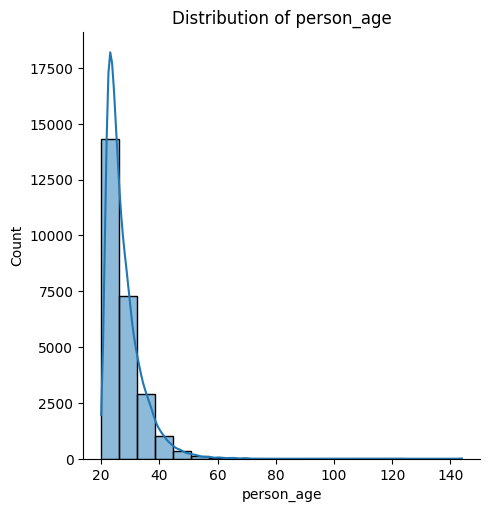

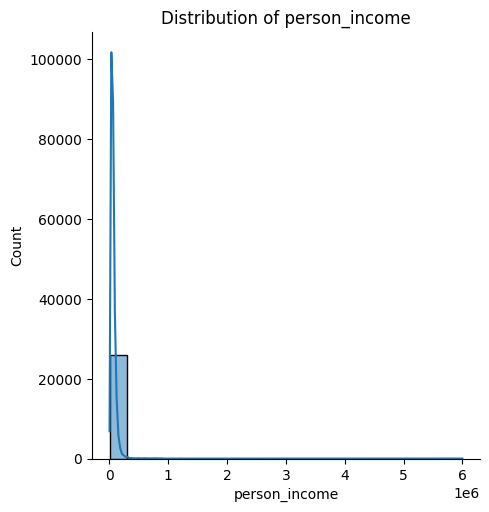

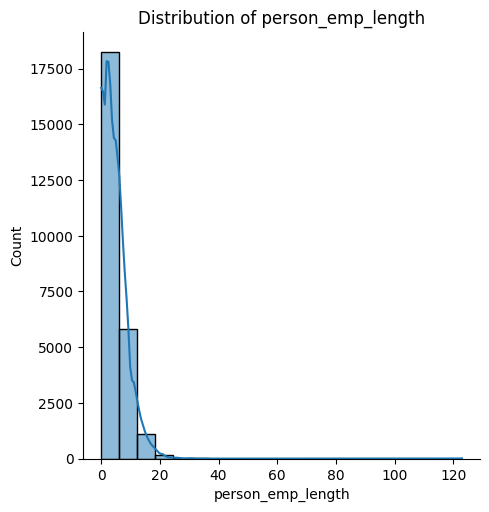

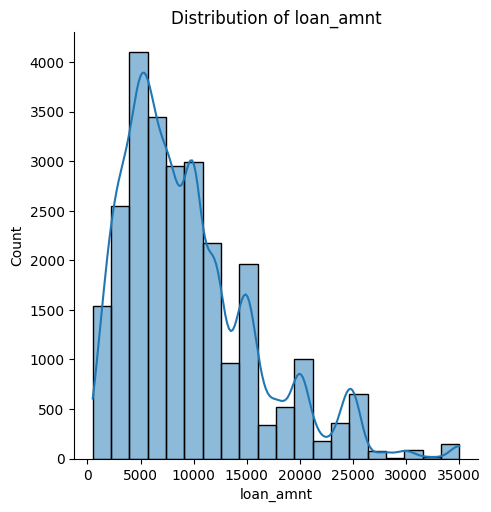

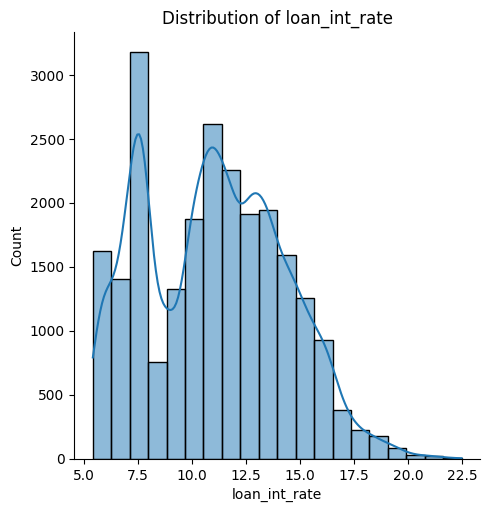

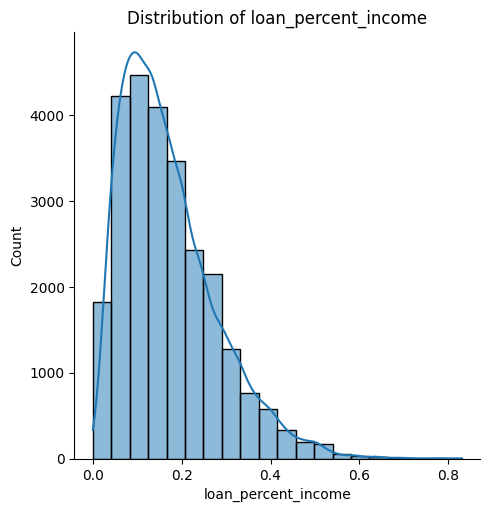

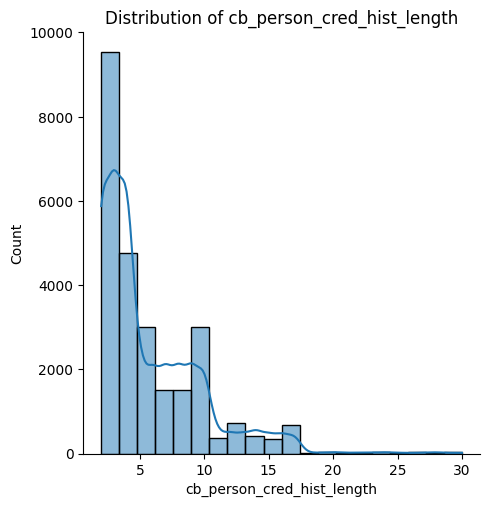

In [83]:
# Melakukan Check Distribusi data pada column Numeric
check_distribution(data=X_train)

Pada masing-masing hasil Plotting pada kolumn numeric:

1. Dari 7 column dapat disimpulkan bahwa Distribusi data pada masing-masing column adalah Positif Skewed (Cenderung terkonsentrasi di sisi kiri grafik) kemudian frekuensi menurun secara bertahap ke arah kanan.
2. Pada beberapa column saya kira masih terdapat Outlier, seperti pada kolom person_age yaitu pada umur 100 - 140 (yang jauh sekali dari umur 20 tahun kebanyakan). dan juga menurut saya terdapat Outlier pada kolom person_income yang dimana kebanyakan pendapatan orang berada di angka 0 - 1 namun disana terdapat sampai angka 6 dst (6e6).
3. Dari EDA kolom2 diatas, dapat saya simpulkan apabila kita ingin mendapat distribusi data yang lebih merata. kita dapat melakukan delete data yang konteksnya terlalu jauh dari kebanyakan (Outlier) tetapi hal tsb harus kita diskusikan kembali bersama Business owner dari dataset ini apakah data tersebut tetap disimpan saja atau harus dirata-ratakan atau diambil nilai tengahnya saja agar merata.

In [85]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 26064 entries, 15884 to 17068
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
26064 non-null  int64
dtypes: int64(1)
memory usage: 407.2 KB


In [86]:
def check_target_balance(y_train, target_column_name='target'):
    """
    Function to check the balance of the target variable in y_train using a count plot.
    
    Parameters:
    y_train (pd.Series or pd.DataFrame): Target variable data.
    target_column_name (str): Name of the target column if y_train is a DataFrame.
    
    Returns:
    None: This function will display a count plot of the target variable.
    """
    # Convert y_train to DataFrame if it is not already
    if isinstance(y_train, pd.Series):
        y_train = y_train.to_frame(name=target_column_name)
    
    # Create count plot
    sns.countplot(data=y_train, x=target_column_name, hue=target_column_name)
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.title('Target Balance')
    plt.show()


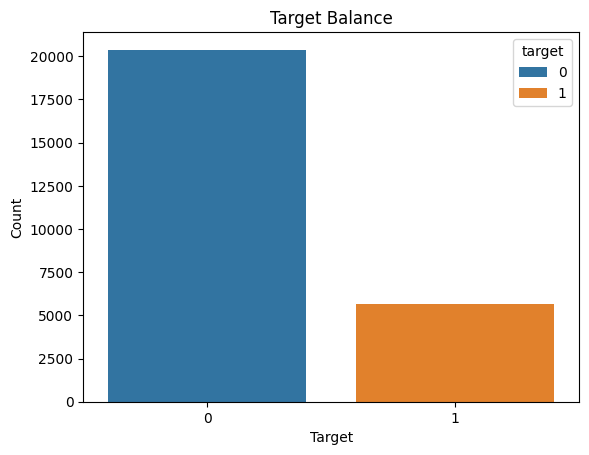

In [87]:
# Memanggil fungsi untuk mengecek keseimbangan target
check_target_balance(y_train=y_train)

Kesimpulan dari EDA y_train (loan_status):

1. terdapat 2 jenis pada kolom loan_status ini yaitu 1 = Meminjam dan 0 = Belum Meminjam.
2. Distribusi Belum meminjam (0) lebih banyak dibandingkan Peminjam.
3. Belum meminjam terdapat 20000 orang, sedangkan Peminjam terdapat 5000 orang.
4. untuk kedepannya mungkin bisa ditingkatkan lagi Campaign perusahaan sehingga peminjam semakin banyak.

# Kesimpulan dari EDA X_train dan y_train:

1. Pengechekan Duplicate data dilakukan agar dapat mencari tahu ada berapa banyak data/row yang duplikat yang mungkin terjadi karena human error saat melakukan input data. dan selanjutnya dapat di diskusikan kembali dengan business owner/analis apakah data dup tsb lebih baik dihilangkan atau tetap dimasukkan kedalam train model.

2. Pengecekan pada Null values dilakukan untuk mengetahui ada berapa banyak sel yang mengalami kekosongan data. pada kasus ini lebih baik data yang kosong tersebut agar diisikan dengan dummy data menggunakan teknik mean, median, atau modus lalu di imput kan.

3. Pengecheckan Distribusi data pada masing-masing kolom x_train dilakukan secara visualisasi agar kita dapat lebih mengetahui sebaran data nya mengalami skewed atau tidak. apabila skewed terlalu jauh. maka dapat didiskusikan kembali agar melakukan penyempitan data dengan men delete data-data outlier.
